In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from numpy import *
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import normalize
import networkx as nx

In [2]:
#1将鸢尾花数据集画成图
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names) #读取csv数据
data = np.array(dataset)
data = data[:,3]
#print(data)

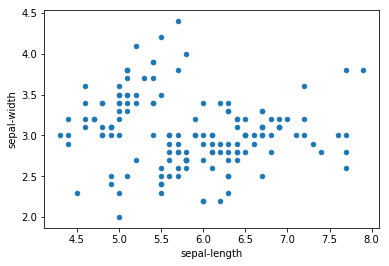

In [3]:
#1绘制散点图
dataset.plot(x='sepal-length', y='sepal-width', kind='scatter')
#3求带权邻接矩阵
aj = np.zeros((150,150))
#print(aj)
for i in range(150):
    for j in range(i+1):
        aj[i,j] = np.dot(data[i]-data[j],data[i]-data[j])
        if(i!=j):
            aj[j,i] = aj[i,j]         
    aj = np.exp(-0.5*aj)
#print(aj)

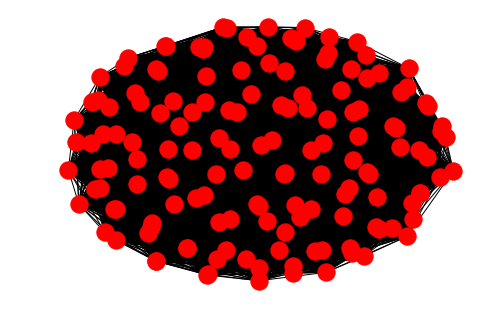

In [4]:
#根据邻接矩阵将鸢尾花数据集绘制成图
G = nx.Graph()
for i in range(len(aj)):
    for j in range(len(aj)):
        G.add_edge(i,j)
nx.draw(G)
plt.show()

In [15]:
#34
#相似性函数
def similarity_function(points):
    res = rbf_kernel(points)
    for i in range(len(res)):
        res[i, i] = 0
    return res
#谱聚类
def spectral_clustering(points, k):
    #:param points: 样本点
    #:param k: 聚类个数
    #:return: 聚类结果
    W = similarity_function(points)
    # 度矩阵D可以从相似度矩阵W得到，这里计算的是D^(-1/2)
    # D = np.diag(np.sum(W, axis=1))
    # Dn = np.sqrt(LA.inv(D))
    Dn = np.diag(np.power(np.sum(W, axis=1), -0.5))
    # 拉普拉斯矩阵：L=Dn*(D-W)*Dn=I-Dn*W*Dn
    L = np.eye(len(points)) - np.dot(np.dot(Dn, W), Dn)
    eigvals, eigvecs = LA.eig(L)
    # 前k小的特征值对应的索引，argsort函数
    indices = np.argsort(eigvals)[:k]
    # 取出前k小的特征值对应的特征向量，并进行正则化
    k_smallest_eigenvectors = normalize(eigvecs[:, indices])
    # 利用KMeans进行聚类
    return KMeans(n_clusters=k).fit_predict(k_smallest_eigenvectors)

In [16]:
X, y = make_blobs()
labels = spectral_clustering(X, 3)

In [17]:
# 画图
plt.style.use('ggplot')

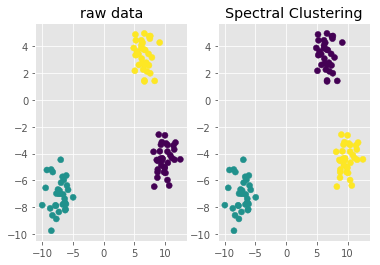

In [18]:
# 原数据
fig, (ax0, ax1) = plt.subplots(ncols=2)
ax0.scatter(X[:, 0], X[:, 1], c=y)
ax0.set_title('raw data')
ax1.scatter(X[:, 0], X[:, 1], c=labels)
ax1.set_title('Spectral Clustering')
plt.show()